In [1]:
import pandas as pd

In [2]:
# Define file paths
WOS_TEXT_FILE = "./WebOfScience/WOS11967/X.txt"
WOS_LABEL_FILE = "./WebOfScience/WOS11967/Y.txt"
WOS_LEVEL1_FILE = "./WebOfScience/WOS11967/YL1.txt"
WOS_LEVEL2_FILE = "./WebOfScience/WOS11967/YL2.txt"

In [3]:
# Function to load text data
def load_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        return [line.strip() for line in f.readlines()]

In [4]:
# Load data from files
texts = load_text_file(WOS_TEXT_FILE)
primary_labels = load_text_file(WOS_LABEL_FILE)
level1_labels = load_text_file(WOS_LEVEL1_FILE)
level2_labels = load_text_file(WOS_LEVEL2_FILE)

In [5]:
# Ensure all lists have the same length
assert len(texts) == len(primary_labels) == len(level1_labels) == len(level2_labels), "Mismatch in data lengths"

In [6]:
# Create a DataFrame
df = pd.DataFrame({
    "text": texts,
    "primary_label": primary_labels,
    "level1_label": level1_labels,
    "level2_label": level2_labels
})

In [7]:
# Save structured dataset as CSV
df.to_csv("wos_dataset2.csv", index=False)

# Display some samples
print(df.head())

                                                text primary_label  \
0  The aim of this study was to investigate (a) t...            10   
1  The detection of negative emotions through dai...             1   
2  DNA/RNA sequencing has recently become a prima...            29   
3  Primary European car-makers agree on a 48 V em...            16   
4  Background: Chronic alcohol intake impacts ski...            23   

  level1_label level2_label  
0            2            2  
1            0            1  
2            6            1  
3            3            3  
4            5            0  


In [8]:
import pandas as pd
import re

In [9]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text


In [10]:
# Load dataset
df = pd.read_csv("wos_dataset2.csv")  # Change this to the correct file path

In [11]:
# Apply text preprocessing
df["text"] = df["text"].apply(clean_text)

In [12]:
# Save preprocessed dataset
df.to_csv("preprocessed_dataset2.csv", index=False)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [14]:
    # Load preprocessed dataset
df = pd.read_csv("preprocessed_dataset2.csv")

C:\Users\yavis\AppData\Local\Temp\ipykernel_23888\1601416645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["level1_label"], order=df["level1_label"].value_counts().index, palette="viridis")


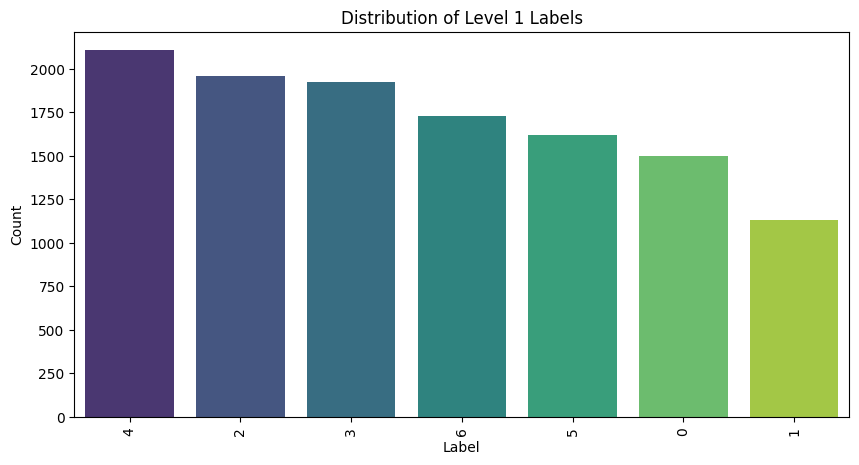

In [15]:
# Step 1: Label Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=df["level1_label"], order=df["level1_label"].value_counts().index, palette="viridis")
plt.title("Distribution of Level 1 Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

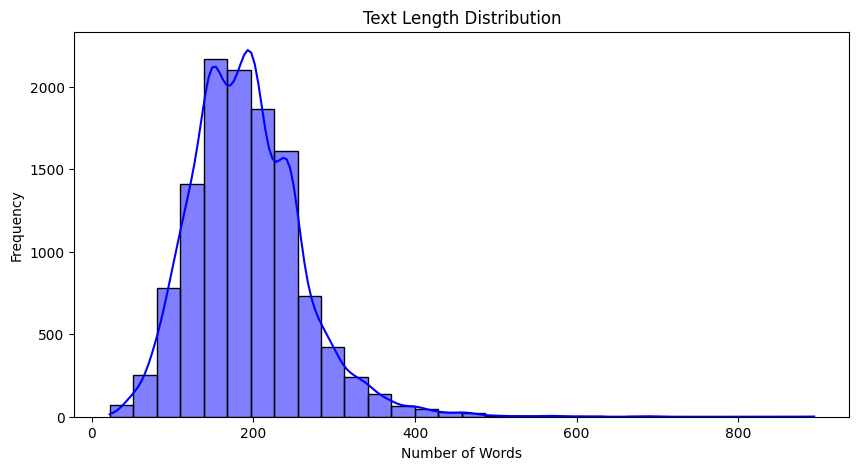

In [16]:
# Step 2: Text Length Distribution
df["text_length"] = df["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df["text_length"], bins=30, kde=True, color="blue")
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

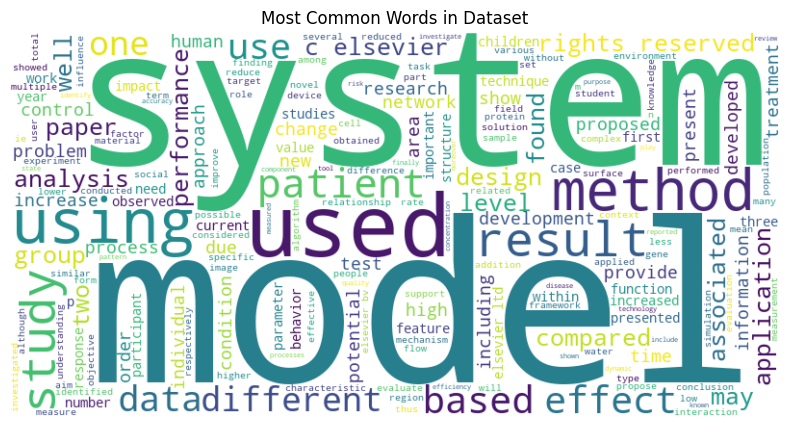

In [17]:
# Step 3: Word Cloud
text_data = " ".join(df["text"].tolist())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Dataset")
plt.show()

In [18]:
import torch
from transformers import DistilBertTokenizer

In [19]:
# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [20]:
# Tokenization function
def tokenize_text(text):
    return tokenizer(
        text, 
        padding='max_length', 
        truncation=True, 
        max_length=512, 
        return_tensors="pt"
    )

In [21]:
# Load your preprocessed dataset
df = pd.read_csv("./preprocessed_dataset2.csv")  # Update path accordingly

In [22]:
print(df.columns)

Index(['text', 'primary_label', 'level1_label', 'level2_label'], dtype='object')


In [23]:
# Apply tokenization
df['tokenized'] = df['text'].apply(lambda x: tokenize_text(x))

In [24]:
# Save tokenized data
torch.save(df['tokenized'].tolist(), "./wos_tokenized2.pt")

In [25]:
# Load tokenized data
tokenized_data = torch.load("wos_tokenized2.pt", weights_only=False)

In [26]:
print(type(tokenized_data))
print(len(tokenized_data))  # If it's a list, check the length
print(tokenized_data[0])  # Print the first item to inspect its structure

<class 'list'>
11967
{'input_ids': tensor([[  101,  1996,  6614,  1997,  2023,  2817,  2001,  2000,  8556,  1037,
          1996, 14260, 23391,  2008,  2024,  6913,  2011,  1998, 18275, 26186,
          2719,  2055, 11480,  4357, 10285,  1998,  1038,  2339, 11480,  4357,
         10285,  4374,  2896,  4357,  2836,  8599,  1996, 14260,  3670,  1997,
          4357, 10089,  2944,  2001,  2580,  2004,  1037, 17158,  7705,  2000,
          8849,  2122,  4262,  2057,  2678,  2696,  5669,  1998, 26223, 12934,
          3105,  7636,  4663,  8599,  1997,  4357, 10089,  1998,  4357,  2836,
          1998,  4738,  3446,  2869,  2000, 14358,  2195, 12064,  1998,  2512,
          6299, 10264, 23391,  1998, 18275, 26186,  1996,  3463,  5393,  2008,
          2261, 14260, 23391,  2021,  2195, 12955,  2020,  3141,  2000,  4357,
          4402,  1998,  4357,  2121,  8599,  1997,  4357, 10089,  2048,  5876,
          6003,  2013,  2256,  5387,  4106,  2006,  1996, 18275, 26186, 27241,
         28228,  

In [27]:
# Extract tokenized text
input_ids = [item['input_ids'] for item in tokenized_data]  # Extract input_ids from each dictionary
attention_masks = [item['attention_mask'] for item in tokenized_data]  # Extract attention masks

In [28]:
# Extract labels from the original DataFrame
primary_labels = df["primary_label"].tolist()
level1_labels = df["level1_label"].tolist()
level2_labels = df["level2_label"].tolist()

In [29]:
input_ids = torch.stack(input_ids)
attention_masks = torch.stack(attention_masks)
primary_labels = torch.tensor(primary_labels, dtype=torch.long)
level1_labels = torch.tensor(level1_labels, dtype=torch.long)
level2_labels = torch.tensor(level2_labels, dtype=torch.long)

In [30]:
# Print to verify
print(f"Input IDs shape: {input_ids.shape}")
print(f"Attention Mask shape: {attention_masks.shape}")
print(f"Primary Labels shape: {primary_labels.shape}")
print(f"Level1 Labels shape: {level1_labels.shape}")
print(f"Level2 Labels shape: {level2_labels.shape}")

Input IDs shape: torch.Size([11967, 1, 512])
Attention Mask shape: torch.Size([11967, 1, 512])
Primary Labels shape: torch.Size([11967])
Level1 Labels shape: torch.Size([11967])
Level2 Labels shape: torch.Size([11967])


In [31]:
# Reshape input_ids and attention_masks to [46985, 512]
input_ids = input_ids.squeeze(1)  # Remove extra dimension
attention_masks = attention_masks.squeeze(1)

# Verify new shapes
print(f"Input IDs shape: {input_ids.shape}")  # Expected: [46985, 512]
print(f"Attention Mask shape: {attention_masks.shape}")  # Expected: [46985, 512]

Input IDs shape: torch.Size([11967, 512])
Attention Mask shape: torch.Size([11967, 512])


In [32]:
# Print to verify
print(f"Input IDs shape: {input_ids.shape}")
print(f"Attention Mask shape: {attention_masks.shape}")
print(f"Primary Labels shape: {primary_labels.shape}")
print(f"Level1 Labels shape: {level1_labels.shape}")
print(f"Level2 Labels shape: {level2_labels.shape}")

Input IDs shape: torch.Size([11967, 512])
Attention Mask shape: torch.Size([11967, 512])
Primary Labels shape: torch.Size([11967])
Level1 Labels shape: torch.Size([11967])
Level2 Labels shape: torch.Size([11967])


In [33]:
from torch.utils.data import Dataset, DataLoader

In [34]:
class WOSDataset(Dataset):
    def __init__(self, input_ids, attention_masks, primary_labels, level1_labels, level2_labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.primary_labels = primary_labels
        self.level1_labels = level1_labels
        self.level2_labels = level2_labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_masks[idx],
            "primary_label": self.primary_labels[idx],
            "level1_label": self.level1_labels[idx],
            "level2_label": self.level2_labels[idx]
        }


In [35]:
# Define batch size
BATCH_SIZE = 16

In [36]:
# Create dataset instance
dataset = WOSDataset(input_ids, attention_masks, primary_labels, level1_labels, level2_labels)

In [37]:
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [38]:
# Test DataLoader
batch = next(iter(dataloader))
print({key: value.shape for key, value in batch.items()})

{'input_ids': torch.Size([16, 512]), 'attention_mask': torch.Size([16, 512]), 'primary_label': torch.Size([16]), 'level1_label': torch.Size([16]), 'level2_label': torch.Size([16])}


In [39]:
import torch.nn as nn
from transformers import DistilBertModel, DistilBertConfig

In [40]:
class HierarchicalClassifier(nn.Module):
    def __init__(self, num_primary_labels, num_level1_labels, num_level2_labels):
        super(HierarchicalClassifier, self).__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")

        # Classification heads
        self.primary_classifier = nn.Linear(self.bert.config.hidden_size, num_primary_labels)
        self.level1_classifier = nn.Linear(self.bert.config.hidden_size, num_level1_labels)
        self.level2_classifier = nn.Linear(self.bert.config.hidden_size, num_level2_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]  # [CLS] token representation

        primary_logits = self.primary_classifier(pooled_output)
        level1_logits = self.level1_classifier(pooled_output)
        level2_logits = self.level2_classifier(pooled_output)

        return primary_logits, level1_logits, level2_logits


In [41]:
import torch.optim as optim
import torch.nn.functional as F

In [42]:
# Define model
num_primary_labels = len(set(primary_labels.tolist()))
num_level1_labels = len(set(level1_labels.tolist()))
num_level2_labels = len(set(level2_labels.tolist()))

model = HierarchicalClassifier(num_primary_labels, num_level1_labels, num_level2_labels)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


HierarchicalClassifier(
  (bert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1):

In [43]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

In [44]:
# Training Loop
EPOCHS = 3
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        primary_labels = batch["primary_label"].to(device)
        level1_labels = batch["level1_label"].to(device)
        level2_labels = batch["level2_label"].to(device)

        optimizer.zero_grad()

        primary_logits, level1_logits, level2_logits = model(input_ids, attention_mask)

        loss_primary = criterion(primary_logits, primary_labels)
        loss_level1 = criterion(level1_logits, level1_labels)
        loss_level2 = criterion(level2_logits, level2_labels)

        loss = loss_primary + loss_level1 + loss_level2
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}")

Epoch 1, Loss: 2.4713
Epoch 2, Loss: 0.8911
Epoch 3, Loss: 0.5865


In [45]:
from sklearn.metrics import accuracy_score, f1_score

In [46]:
def evaluate_model(model, dataloader, device):
    model.eval()

    all_preds_primary = []
    all_labels_primary = []

    all_preds_level1 = []
    all_labels_level1 = []

    all_preds_level2 = []
    all_labels_level2 = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            primary_labels = batch["primary_label"].to(device)
            level1_labels = batch["level1_label"].to(device)
            level2_labels = batch["level2_label"].to(device)

            primary_logits, level1_logits, level2_logits = model(input_ids, attention_mask)

            all_preds_primary.extend(torch.argmax(primary_logits, dim=1).cpu().numpy())
            all_labels_primary.extend(primary_labels.cpu().numpy())

            all_preds_level1.extend(torch.argmax(level1_logits, dim=1).cpu().numpy())
            all_labels_level1.extend(level1_labels.cpu().numpy())

            all_preds_level2.extend(torch.argmax(level2_logits, dim=1).cpu().numpy())
            all_labels_level2.extend(level2_labels.cpu().numpy())

    print("📊 **Primary Level Evaluation**")
    print("Accuracy:", accuracy_score(all_labels_primary, all_preds_primary))
    print("F1 Score (Macro):", f1_score(all_labels_primary, all_preds_primary, average='macro'))

    print("\n📊 **Level 1 Evaluation**")
    print("Accuracy:", accuracy_score(all_labels_level1, all_preds_level1))
    print("F1 Score (Macro):", f1_score(all_labels_level1, all_preds_level1, average='macro'))

    print("\n📊 **Level 2 Evaluation**")
    print("Accuracy:", accuracy_score(all_labels_level2, all_preds_level2))
    print("F1 Score (Macro):", f1_score(all_labels_level2, all_preds_level2, average='macro'))


In [47]:
evaluate_model(model, dataloader, device)

📊 **Primary Level Evaluation**
Accuracy: 0.9646527951867636
F1 Score (Macro): 0.9635661129507236

📊 **Level 1 Evaluation**
Accuracy: 0.9882175983955879
F1 Score (Macro): 0.9879644007361471

📊 **Level 2 Evaluation**
Accuracy: 0.9694158937076962
F1 Score (Macro): 0.9692019720662085


In [48]:
# Save the full model (not just weights)
torch.save(model, "cpm_hierarchical_full_model2.pt")
print("✅ Full model saved as 'cpm_hierarchical_full_model.pt'")

✅ Full model saved as 'cpm_hierarchical_full_model.pt'
